# Practical 2
# Linear Regression(Ordinary Least Square And Gradient Descent)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("demodata.csv")

In [3]:
data

,HOURS (X),TOPICS SOLVED (Y)
0,1.0,1.5
1,1.2,2.0
2,1.5,3.0
3,2.0,1.8
4,2.3,2.7
5,2.5,4.7
6,2.7,7.1
7,3.0,10.0
8,3.1,6.0
9,3.2,5.0


In [4]:
#getting to hours study hours and topics solved
data.head()

,HOURS (X),TOPICS SOLVED (Y)
0,1.0,1.5
1,1.2,2.0
2,1.5,3.0
3,2.0,1.8
4,2.3,2.7


In [5]:
#Now We Apply Linear Regression Using Ordinary Least Square Method..
#Y = mx+c


X = data[['HOURS (X)']]
Y = data[['TOPICS SOLVED (Y)']]
count = data['HOURS (X)'].count()


In [6]:
total_x = sum(data['HOURS (X)'])
total_y = sum(data['TOPICS SOLVED (Y)'])

data['x_squared_value'] = X**2
data['y_squared_value']=Y**2

print("Total of X and Y is:",total_x," ",total_y)


#Now Calculating Means of X ,Y..
x_mean,y_mean = data['HOURS (X)'].mean(),data['TOPICS SOLVED (Y)'].mean()
print("Mean of X and Y is ",x_mean," ",y_mean)

data['xy']  = data['HOURS (X)']*data['TOPICS SOLVED (Y)']


eq1 = count*sum(data['xy']) - total_x*total_y 

eq2 = count*sum(data['x_squared_value']) - (total_x)**2

b = eq1/eq2


eq3 = total_y - b * total_x

a  = eq3 / count

print("The Value of B is",b," ","The Value of A is",a)

y_predicted_value = b*X+a













Total of X and Y is: 26.1   52.699999999999996
Mean of X and Y is  2.372727272727273   4.79090909090909
The Value of B is 2.8002947678703007   The Value of A is -1.85342667649226


In [7]:
data['y_predicted_value'] = y_predicted_value


#finding the Residual Error For each Data Sets...
data['error'] = data['TOPICS SOLVED (Y)'] - data['y_predicted_value']


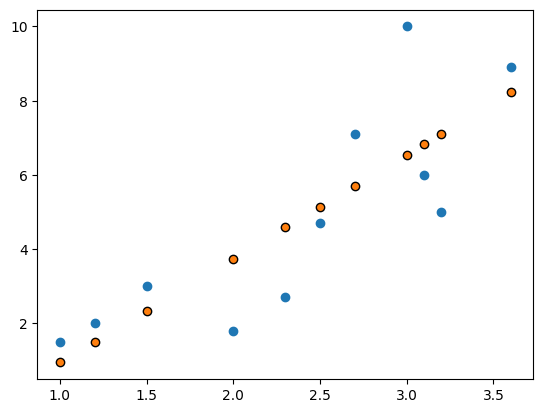

In [8]:
#Plotting the Data...
plt.scatter(X,Y) #Plotting the Actual Data..
plt.scatter(X,y_predicted_value,edgecolors='Black')
plt.show()

In [9]:
#Sum of Square = (Difference between Actual data -  Model Predicted Value )^2
sum_of_square = sum(data['error']**2)
sum_of_square

27.96661753868829

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

new_x =data['HOURS (X)'].to_numpy().reshape([-1,1])
new_y = data['TOPICS SOLVED (Y)'].to_numpy().reshape([-1,1])

reg.fit(new_x,new_y)



LinearRegression()

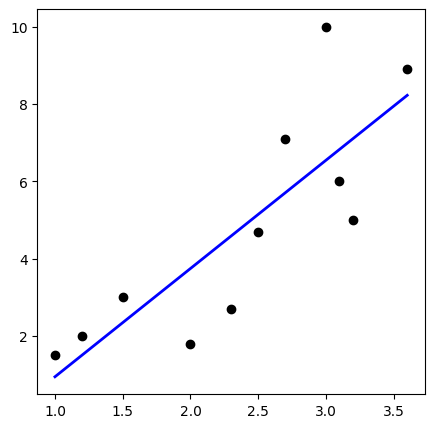

In [17]:
prediction = reg.predict(new_x)

plt.figure(figsize=(5,5))

plt.scatter(
    data['HOURS (X)'],
    data['TOPICS SOLVED (Y)'],
    c='black'
)

plt.plot(
    data['HOURS (X)'],
    prediction,
    c='blue',
    linewidth = 2
)

In [13]:
data['prediction'] = prediction

In [14]:
data

,HOURS (X),TOPICS SOLVED (Y),x_squared_value,y_squared_value,xy,y_predicted_value,error,prediction
0,1.0,1.5,1.00,2.25,1.50,0.946868,0.553132,0.946868
1,1.2,2.0,1.44,4.00,2.40,1.506927,0.493073,1.506927
2,1.5,3.0,2.25,9.00,4.50,2.347015,0.652985,2.347015
3,2.0,1.8,4.00,3.24,3.60,3.747163,-1.947163,3.747163
4,2.3,2.7,5.29,7.29,6.21,4.587251,-1.887251,4.587251
5,2.5,4.7,6.25,22.09,11.75,5.147310,-0.447310,5.147310
6,2.7,7.1,7.29,50.41,19.17,5.707369,1.392631,5.707369
7,3.0,10.0,9.00,100.00,30.00,6.547458,3.452542,6.547458
8,3.1,6.0,9.61,36.00,18.60,6.827487,-0.827487,6.827487
9,3.2,5.0,10.24,25.00,16.00,7.107517,-2.107517,7.107517


In [15]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    learning_rate = 0.001
    n = len(X)
    for i in range(iterations):

        y_predicted = m_curr*x+b_curr
        m_derivative = -(2/n)*sum(data['HOURS (X)']*data['error'])
        b_derivative = -(2/n)*sum((data['error']))
        m_curr = m_curr - learning_rate * m_derivative
        b_curr = b_curr - learning_rate*b_derivative
        print("m {} , b {},iteration {}".format(m_curr,b_curr,i))

In [16]:
gradient_descent(data['HOURS (X)'],data['TOPICS SOLVED (Y)'])

#By Ashish Vinod IT154

m 7.186170850301014e-18 , b 2.260817795600319e-18,iteration 0
m 1.4372341700602027e-17 , b 4.521635591200638e-18,iteration 1
m 2.155851255090304e-17 , b 6.782453386800957e-18,iteration 2
m 2.8744683401204054e-17 , b 9.043271182401276e-18,iteration 3
m 3.593085425150507e-17 , b 1.1304088978001594e-17,iteration 4
m 4.3117025101806085e-17 , b 1.3564906773601913e-17,iteration 5
m 5.03031959521071e-17 , b 1.5825724569202233e-17,iteration 6
m 5.748936680240811e-17 , b 1.808654236480255e-17,iteration 7
m 6.467553765270912e-17 , b 2.034736016040287e-17,iteration 8
m 7.186170850301014e-17 , b 2.260817795600319e-17,iteration 9
m 7.904787935331115e-17 , b 2.4868995751603507e-17,iteration 10
m 8.623405020361217e-17 , b 2.7129813547203826e-17,iteration 11
m 9.342022105391318e-17 , b 2.939063134280415e-17,iteration 12
m 1.006063919042142e-16 , b 3.1651449138404466e-17,iteration 13
m 1.0779256275451521e-16 , b 3.3912266934004784e-17,iteration 14
m 1.1497873360481622e-16 , b 3.61730847296051e-17,itera

# By Ashish Vinod IT154